## Loading Essential Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras import regularizers

## Loading Dataset with num of words upto 10,000

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



Data Exploration to visualize the shapes of training and test data

In [ ]:
# exploring the shapes of data
train_data.shape
test_data.shape

(25000,)

In [ ]:
print(f"First index of train data", train_data[0])
print(f"first index of train lablel", train_labels[0])

First index of train data [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
first index of train lablel 1


In [ ]:
print(f"Checking the maximum index in train data", max([max(sequence) for sequence in train_data]))

Checking the maximum index in train data 9999


## One Hot Encoding

One Hot encoding for converting the integers into 0s and 1s tensor vector.

In [ ]:
# One-hot encode the sequences
def one_hot_encode(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

# One-hot encode the train and test data
x_train = one_hot_encode(train_data, dimension=10000)
x_test = one_hot_encode(test_data, dimension=10000)

print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Model Building using three dense layers

In [ ]:
model=keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.5839 - loss: 0.6445 - val_accuracy: 0.8228 - val_loss: 0.5167
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8569 - loss: 0.4663 - val_accuracy: 0.8038 - val_loss: 0.4453
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9053 - loss: 0.3479 - val_accuracy: 0.8813 - val_loss: 0.3399
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9284 - loss: 0.2662 - val_accuracy: 0.8861 - val_loss: 0.3062
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9418 - loss: 0.2101 - val_accuracy: 0.8870 - val_loss: 0.2851
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9506 - loss: 0.1728 - val_accuracy: 0.8826 - val_loss: 0.2942
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9582 - loss: 0.1531 - val_accuracy: 0.8747 - val_loss: 0.3175
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9664 - loss: 0.1291 - val_accuracy: 0.8863 - 

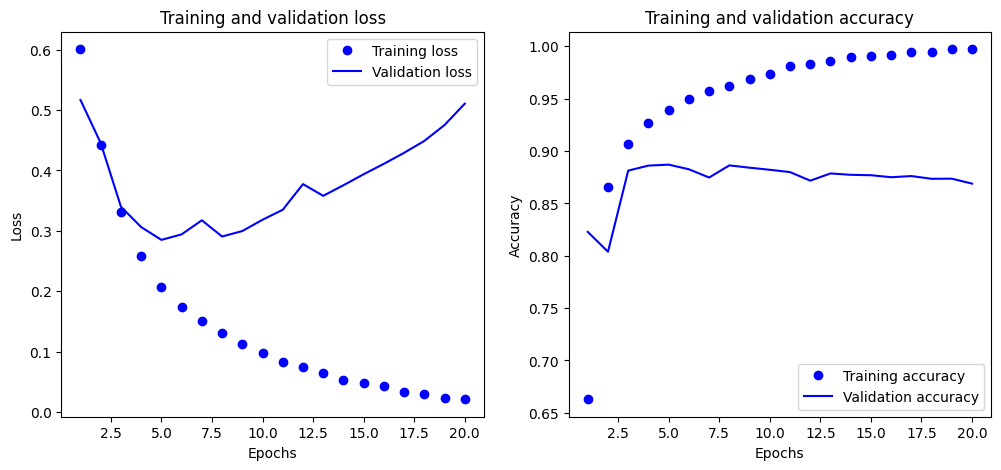

In [ ]:
import matplotlib.pyplot as plt

# Retrieve the history of accuracy and loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model=keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7311 - loss: 0.5636
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8990 - loss: 0.2953
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9259 - loss: 0.2155
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9392 - loss: 0.1786
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8848 - loss: 0.2864


## Prediction on New Data

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.17296048],
       [0.9999274 ],
       [0.85118526],
       ...,
       [0.09720881],
       [0.07566576],
       [0.48252416]], dtype=float32)

## Model with one hidden layers

In [ ]:
# Model with one hidden layer
model_one_layer = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_one_layer.compile(optimizer='rmsprop',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

history_one_layer = model_one_layer.fit(partial_x_train,
                                        partial_y_train,
                                        epochs=20,
                                        batch_size=512,
                                        validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.6881 - loss: 0.5894 - val_accuracy: 0.8650 - val_loss: 0.4035
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8982 - loss: 0.3472 - val_accuracy: 0.8836 - val_loss: 0.3247
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9161 - loss: 0.2715 - val_accuracy: 0.8809 - val_loss: 0.3044
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9301 - loss: 0.2203 - val_accuracy: 0.8892 - val_loss: 0.2810
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9412 - loss: 0.1910 - val_accuracy: 0.8850 - val_loss: 0.2845
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9492 - loss: 0.1722 - val_accuracy: 0.8859 - val_loss: 0.2751
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9541 - loss: 0.1526 - val_accuracy: 0.8843 - val_loss: 0.2805
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9611 - loss: 0.1388 - val_accuracy: 0.8850 - v

## Model with three hidden layers

In [ ]:
# Model with three hidden layer
model_three_layer = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_three_layer.compile(optimizer='rmsprop',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

history_three_layer = model_one_layer.fit(partial_x_train,
                                        partial_y_train,
                                        epochs=20,
                                        batch_size=512,
                                        validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9930 - loss: 0.0471 - val_accuracy: 0.8754 - val_loss: 0.3981
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9939 - loss: 0.0433 - val_accuracy: 0.8754 - val_loss: 0.3988
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9943 - loss: 0.0410 - val_accuracy: 0.8735 - val_loss: 0.4252
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9949 - loss: 0.0379 - val_accuracy: 0.8705 - val_loss: 0.4235
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9946 - loss: 0.0365 - val_accuracy: 0.8728 - val_loss: 0.4301
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9968 - loss: 0.0313 - val_accuracy: 0.8732 - val_loss: 0.4490
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9975 - loss: 0.0290 - val_accuracy: 0.8725 - val_loss: 0.4611
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9973 - loss: 0.0271 - val_accuracy: 0.8706 - v

## Model with two hidden layers and tanh activation and mse loss function

In [ ]:
# Model with two hidden layers and tanh activation and mse loss function
model_modified = keras.Sequential([
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

model_modified.compile(optimizer='rmsprop',
                        loss='mse',
                        metrics=['accuracy'])

history_modified = model_one_layer.fit(partial_x_train,
                                        partial_y_train,
                                        epochs=20,
                                        batch_size=512,
                                        validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9999 - loss: 0.0102 - val_accuracy: 0.8683 - val_loss: 0.6041
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9998 - loss: 0.0098 - val_accuracy: 0.8678 - val_loss: 0.6234
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9999 - loss: 0.0094 - val_accuracy: 0.8665 - val_loss: 0.6276
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 0.8658 - val_loss: 0.6354
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9999 - loss: 0.0077 - val_accuracy: 0.8665 - val_loss: 0.6446
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9999 - loss: 0.0078 - val_accuracy: 0.8653 - val_loss: 0.6553
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9997 - loss: 0.0069 - val_accuracy: 0.8633 - val_loss: 0.6757
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9997 - loss: 0.0069 - val_accuracy: 0.8661 - v

## Evaluation of Models

In [ ]:
# Evaluate the models on the test data
test_loss_one_layer, test_acc_one_layer = model_one_layer.evaluate(x_test, y_test)
test_loss_three_layers, test_acc_three_layers = model_three_layer.evaluate(x_test, y_test)
test_loss_modified, test_acc_modified = model_modified.evaluate(x_test, y_test)

print(f"Test accuracy with one hidden layer: {test_acc_one_layer}")
print(f"Test accuracy with three hidden layers: {test_acc_three_layers}")
print(f"Test accuracy with modified model: {test_acc_modified}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8506 - loss: 0.8688
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5073 - loss: 0.6989
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4821 - loss: 0.2600
Test accuracy with one hidden layer: 0.853600025177002
Test accuracy with three hidden layers: 0.5000399947166443
Test accuracy with modified model: 0.48655998706817627


## Model with Regularization Technique

In [ ]:
# Model with dropout layers
model_with_dropout = keras.Sequential([
    layers.Dense(16, activation='tanh', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation='tanh', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_with_dropout.compile(optimizer='rmsprop',
                           loss='mse',
                           metrics=['accuracy'])

history_with_dropout = model_with_dropout.fit(partial_x_train,
                                              partial_y_train,
                                              epochs=20,
                                              batch_size=512,
                                              validation_data=(x_val, y_val))

# Evaluate the model on the test data
test_loss_with_dropout, test_acc_with_dropout = model_with_dropout.evaluate(x_test, y_test)

print(f"Test accuracy with dropout: {test_acc_with_dropout}")

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.6730 - loss: 0.2537 - val_accuracy: 0.8649 - val_loss: 0.1588
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8672 - loss: 0.1580 - val_accuracy: 0.8455 - val_loss: 0.1509
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8936 - loss: 0.1310 - val_accuracy: 0.8829 - val_loss: 0.1253
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9209 - loss: 0.1102 - val_accuracy: 0.8853 - val_loss: 0.1213
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9229 - loss: 0.1013 - val_accuracy: 0.8847 - val_loss: 0.1205
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9307 - loss: 0.0952 - val_accuracy: 0.8716 - val_loss: 0.1300
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9400 - loss: 0.0887 - val_accuracy: 0.8829 - val_loss: 0.1182
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9488 - loss: 0.0797 - val_accuracy: 0.8825 - 

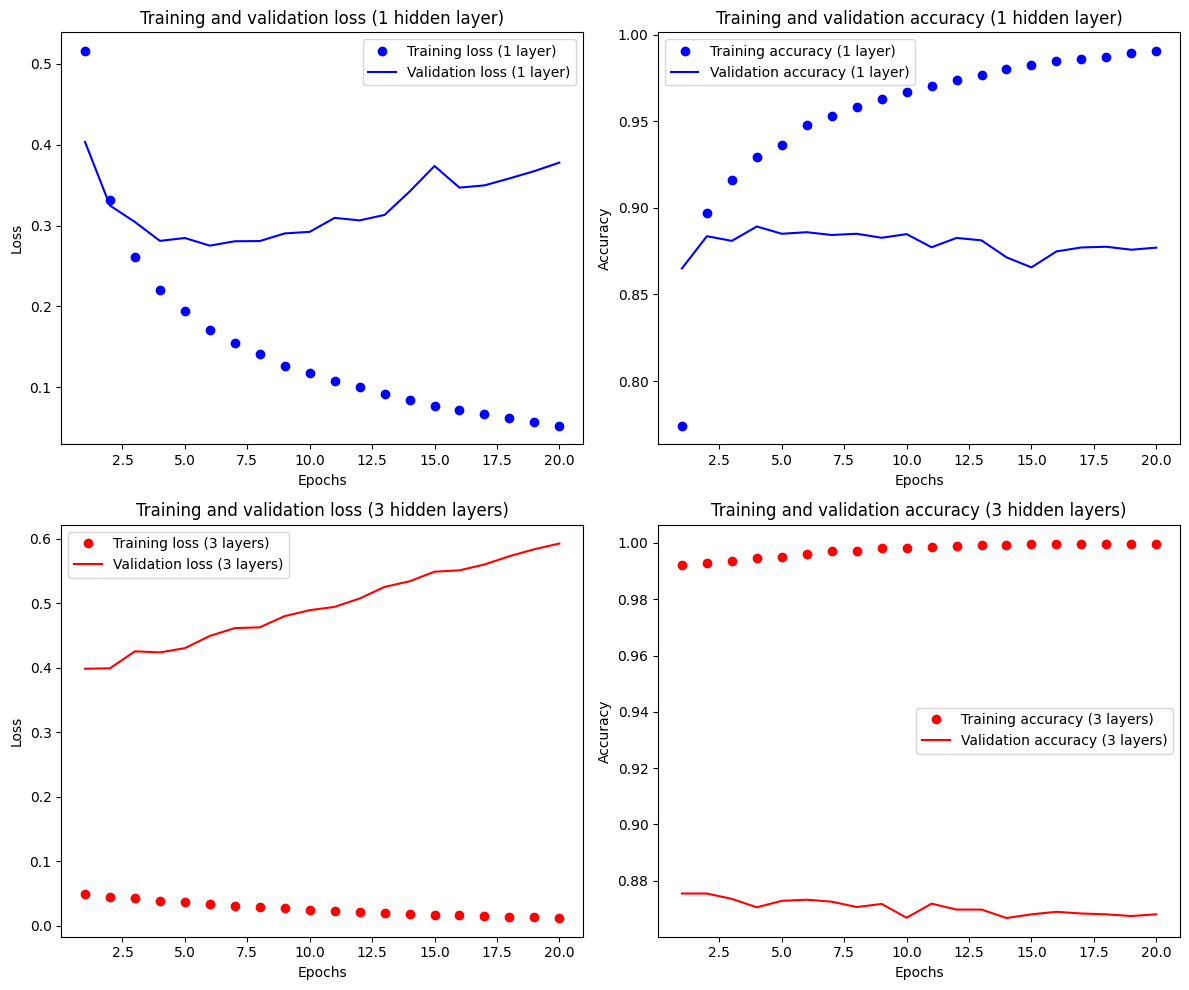

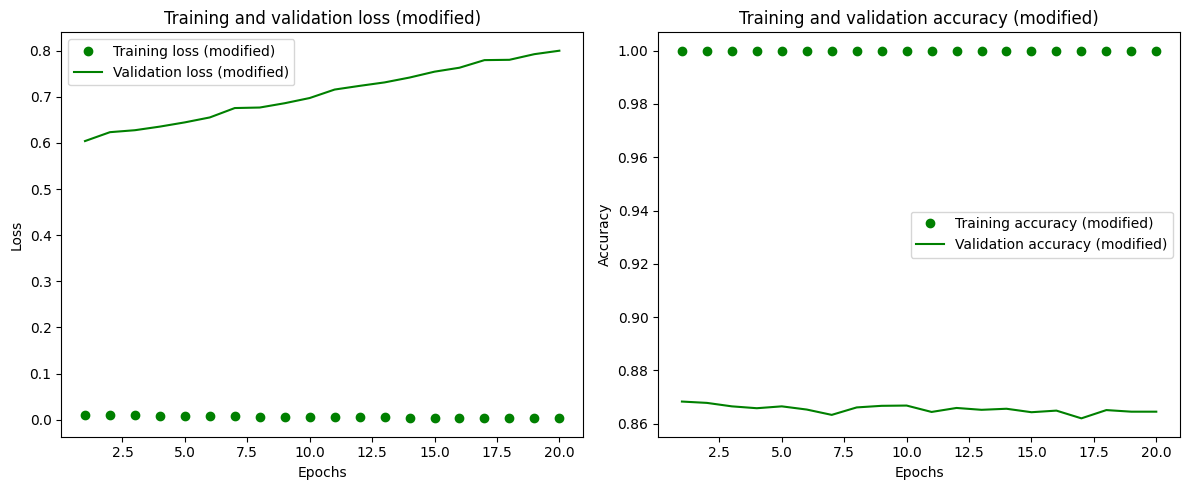

In [ ]:
# Retrieve the history of accuracy and loss for one hidden layer
history_dict_one_layer = history_one_layer.history
loss_values_one_layer = history_dict_one_layer['loss']
val_loss_values_one_layer = history_dict_one_layer['val_loss']
acc_values_one_layer = history_dict_one_layer['accuracy']
val_acc_values_one_layer = history_dict_one_layer['val_accuracy']

# Retrieve the history of accuracy and loss for three hidden layers
history_dict_three_layers = history_three_layer.history
loss_values_three_layers = history_dict_three_layers['loss']
val_loss_values_three_layers = history_dict_three_layers['val_loss']
acc_values_three_layers = history_dict_three_layers['accuracy']
val_acc_values_three_layers = history_dict_three_layers['val_accuracy']

# Retrieve the history of accuracy and loss for modified function
history_dict_modified = history_modified.history
loss_modified = history_dict_modified['loss']
val_loss_modified = history_dict_modified['val_loss']
acc_values_modified = history_dict_modified['accuracy']
val_acc_values_modified = history_dict_modified['val_accuracy']

epochs = range(1, len(loss_values_one_layer) + 1)

# Plotting for one and three hidden layers (as before)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(epochs, loss_values_one_layer, 'bo', label='Training loss (1 layer)')
plt.plot(epochs, val_loss_values_one_layer, 'b', label='Validation loss (1 layer)')
plt.title('Training and validation loss (1 hidden layer)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, acc_values_one_layer, 'bo', label='Training accuracy (1 layer)')
plt.plot(epochs, val_acc_values_one_layer, 'b', label='Validation accuracy (1 layer)')
plt.title('Training and validation accuracy (1 hidden layer)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, loss_values_three_layers, 'ro', label='Training loss (3 layers)')
plt.plot(epochs, val_loss_values_three_layers, 'r', label='Validation loss (3 layers)')
plt.title('Training and validation loss (3 hidden layers)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, acc_values_three_layers, 'ro', label='Training accuracy (3 layers)')
plt.plot(epochs, val_acc_values_three_layers, 'r', label='Validation accuracy (3 layers)')
plt.title('Training and validation accuracy (3 hidden layers)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# NEW FIGURE FOR MODIFIED MODEL
plt.figure(figsize=(12, 5))  # Adjust size as needed

plt.subplot(1, 2, 1) # Changed to 1 row, 2 columns
plt.plot(epochs, loss_modified, 'go', label='Training loss (modified)') # Changed color to green
plt.plot(epochs, val_loss_modified, 'g', label='Validation loss (modified)') # Changed color to green
plt.title('Training and validation loss (modified)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2) # Changed to 1 row, 2 columns
plt.plot(epochs, acc_values_modified, 'go', label='Training accuracy (modified)') # Changed color to green
plt.plot(epochs, val_acc_values_modified, 'g', label='Validation accuracy (modified)') # Changed color to green
plt.title('Training and validation accuracy (modified)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()